In [107]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
import glob
import os
import string
import logging
import pandas as pd

In [98]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

{tag: path} and the path will be later replaced with the cleaned document text.

In [73]:
preprints = glob.glob('corpus/*[.txt]')
documents = {os.path.splitext(os.path.basename(preprint))[0]: preprint for preprint in preprints}

In [74]:
# Prepare data
for doc in documents: 
    with open(documents[doc], 'r') as file:
        text = file.read().split(' ')
        table = str.maketrans('', '', string.punctuation)
        stripped = ' '.join([w.translate(table) for w in text])
        documents[doc] = stripped
    

In [76]:
len(documents)

40

In [103]:
class PreprintIterator(object):
    def __iter__(self):
        preprints = glob.glob('corpus/*[.txt]')
        for preprint in preprints:
            with open(preprint, 'r') as file:
                tag = os.path.splitext(os.path.basename(preprint))[0]
                text = file.read().split(' ')
                table = str.maketrans('', '', string.punctuation)
                stripped = ' '.join([w.translate(table) for w in text])
                yield TaggedDocument(words=nltk.word_tokenize(stripped), tags=[tag])

Hyphenated words become one word, e.g. spectroscopically-confirmed --> spectroscopicallyconfirmed. 

In [77]:
tagged_data = [TaggedDocument(words=nltk.word_tokenize(documents[d].lower()), tags=[d]) for d in documents]

In [80]:
tagged_data

[TaggedDocument(words=['highenergy', 'observations', 'performed', 'in', 'the', 'last', 'two', 'decades', 'have', 'unveiled', 'the', 'existence', 'of', 'a', 'few', 'unusual', 'classes', 'of', 'neutron', 'stars', 'nss', 'see', 'popov', '2007', 'for', 'a', 'review', 'the', 'anomalous', 'xray', 'pulsars', 'axps', 'and', 'the', 'soft', 'gammaray', 'repeaters', 'sgrs', 'are', 'among', 'them', 'the', 'most', 'peculiar', 'objects', 'see', 'woods', 'thompson', '2006', 'for', 'a', 'recent', 'review', 'at', 'variance', 'with', 'the', 'majority', 'of', 'the', 'nss', 'known', 'so', 'far', 'ie', 'the', 'radio', 'pulsars', 'they', 'are', 'typically', 'radio', 'quiet', 'but', 'show', 'xray', 'pulsations', 'at', 'periods', 'of', 'a', 'few', 'seconds', 'furthermore', 'the', 'xray', 'luminosity', 'of', 'both', 'sgrs', 'and', 'axps', 'largely', 'exceeds', 'their', 'rotational', 'energy', 'while', 'the', 'rotational', 'energy', 'of', 'radio', 'pulsars', 'can', 'easily', 'account', 'for', 'their', 'xray', '

In [127]:
doc_iterator = PreprintIterator()
model = Doc2Vec(documents=doc_iterator,
                workers=4, # num of cpus
                vector_size=100,
                alpha=0.025, 
                min_alpha=0.00025,
                min_count=1,
                dm=1,
                epochs=4)
  
# model.build_vocab(tagged_data)

model.save("d2v.model")
print("Model Saved")

2019-03-07 23:50:07,280 : INFO : collecting all words and their counts
2019-03-07 23:50:07,392 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-03-07 23:53:35,817 : INFO : collected 162208 word types and 4091 unique tags from a corpus of 4091 examples and 19197673 words
2019-03-07 23:53:35,818 : INFO : Loading a fresh vocabulary
2019-03-07 23:53:36,984 : INFO : effective_min_count=1 retains 162208 unique words (100% of original 162208, drops 0)
2019-03-07 23:53:36,986 : INFO : effective_min_count=1 leaves 19197673 word corpus (100% of original 19197673, drops 0)
2019-03-07 23:53:38,246 : INFO : deleting the raw counts dictionary of 162208 items
2019-03-07 23:53:38,251 : INFO : sample=0.001 downsamples 27 most-common words
2019-03-07 23:53:38,252 : INFO : downsampling leaves estimated 14761658 word corpus (76.9% of prior 19197673)
2019-03-07 23:53:39,089 : INFO : estimated required memory for 162208 words and 100 dimensions: 213325000 bytes
2019-03-07

2019-03-07 23:54:52,003 : INFO : EPOCH 1 - PROGRESS: at 31.73% examples, 71478 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:53,079 : INFO : EPOCH 1 - PROGRESS: at 32.29% examples, 71579 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:54,121 : INFO : EPOCH 1 - PROGRESS: at 32.83% examples, 71695 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:55,192 : INFO : EPOCH 1 - PROGRESS: at 33.46% examples, 71789 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:56,233 : INFO : EPOCH 1 - PROGRESS: at 34.07% examples, 71815 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:57,366 : INFO : EPOCH 1 - PROGRESS: at 34.71% examples, 71838 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:54:58,524 : INFO : EPOCH 1 - PROGRESS: at 35.08% examples, 71508 words/s, in_qsize 0, out_qsize 1
2019-03-07 23:54:59,562 : INFO : EPOCH 1 - PROGRESS: at 35.47% examples, 71297 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:55:00,588 : INFO : EPOCH 1 - PROGRESS: at 35.93% examples, 71102 words/s, in_qsize 0, out_

2019-03-07 23:56:10,880 : INFO : EPOCH 1 - PROGRESS: at 68.37% examples, 68426 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:11,923 : INFO : EPOCH 1 - PROGRESS: at 68.83% examples, 68464 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:12,991 : INFO : EPOCH 1 - PROGRESS: at 69.52% examples, 68549 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:14,087 : INFO : EPOCH 1 - PROGRESS: at 70.06% examples, 68613 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:15,090 : INFO : EPOCH 1 - PROGRESS: at 70.45% examples, 68501 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:16,096 : INFO : EPOCH 1 - PROGRESS: at 70.67% examples, 68299 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:17,102 : INFO : EPOCH 1 - PROGRESS: at 71.25% examples, 68236 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:18,125 : INFO : EPOCH 1 - PROGRESS: at 71.87% examples, 68319 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:56:19,182 : INFO : EPOCH 1 - PROGRESS: at 72.33% examples, 68301 words/s, in_qsize 0, out_

2019-03-07 23:57:24,157 : INFO : EPOCH 2 - PROGRESS: at 4.13% examples, 64071 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:25,173 : INFO : EPOCH 2 - PROGRESS: at 4.50% examples, 62834 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:26,334 : INFO : EPOCH 2 - PROGRESS: at 5.04% examples, 63825 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:27,417 : INFO : EPOCH 2 - PROGRESS: at 5.60% examples, 64646 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:28,432 : INFO : EPOCH 2 - PROGRESS: at 6.14% examples, 64022 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:29,460 : INFO : EPOCH 2 - PROGRESS: at 6.60% examples, 64683 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:30,495 : INFO : EPOCH 2 - PROGRESS: at 6.87% examples, 63834 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:31,566 : INFO : EPOCH 2 - PROGRESS: at 6.99% examples, 62527 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:57:32,617 : INFO : EPOCH 2 - PROGRESS: at 7.41% examples, 61969 words/s, in_qsize 0, out_qsize 0
2

2019-03-07 23:58:41,993 : INFO : EPOCH 2 - PROGRESS: at 40.04% examples, 69521 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:43,060 : INFO : EPOCH 2 - PROGRESS: at 40.48% examples, 69470 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:44,124 : INFO : EPOCH 2 - PROGRESS: at 40.92% examples, 69433 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:45,166 : INFO : EPOCH 2 - PROGRESS: at 41.36% examples, 69557 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:46,245 : INFO : EPOCH 2 - PROGRESS: at 41.87% examples, 69457 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:47,350 : INFO : EPOCH 2 - PROGRESS: at 42.21% examples, 69139 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:48,359 : INFO : EPOCH 2 - PROGRESS: at 42.73% examples, 69168 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:49,360 : INFO : EPOCH 2 - PROGRESS: at 43.29% examples, 69224 words/s, in_qsize 0, out_qsize 0
2019-03-07 23:58:50,442 : INFO : EPOCH 2 - PROGRESS: at 43.71% examples, 69123 words/s, in_qsize 0, out_

2019-03-08 00:00:01,076 : INFO : EPOCH 2 - PROGRESS: at 76.83% examples, 67606 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:02,346 : INFO : EPOCH 2 - PROGRESS: at 77.34% examples, 67494 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:03,378 : INFO : EPOCH 2 - PROGRESS: at 77.93% examples, 67530 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:04,611 : INFO : EPOCH 2 - PROGRESS: at 78.39% examples, 67442 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:05,616 : INFO : EPOCH 2 - PROGRESS: at 78.71% examples, 67417 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:06,681 : INFO : EPOCH 2 - PROGRESS: at 79.22% examples, 67472 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:07,724 : INFO : EPOCH 2 - PROGRESS: at 79.71% examples, 67476 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:08,731 : INFO : EPOCH 2 - PROGRESS: at 80.20% examples, 67500 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:00:09,771 : INFO : EPOCH 2 - PROGRESS: at 80.59% examples, 67435 words/s, in_qsize 0, out_

2019-03-08 00:01:15,662 : INFO : EPOCH 3 - PROGRESS: at 10.58% examples, 68741 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:16,727 : INFO : EPOCH 3 - PROGRESS: at 11.12% examples, 69392 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:17,809 : INFO : EPOCH 3 - PROGRESS: at 11.66% examples, 69658 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:18,931 : INFO : EPOCH 3 - PROGRESS: at 12.15% examples, 69542 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:20,019 : INFO : EPOCH 3 - PROGRESS: at 12.69% examples, 70202 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:21,089 : INFO : EPOCH 3 - PROGRESS: at 13.03% examples, 70206 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:22,125 : INFO : EPOCH 3 - PROGRESS: at 13.59% examples, 70397 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:23,190 : INFO : EPOCH 3 - PROGRESS: at 13.96% examples, 69742 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:01:24,203 : INFO : EPOCH 3 - PROGRESS: at 14.35% examples, 69634 words/s, in_qsize 0, out_

2019-03-08 00:02:34,138 : INFO : EPOCH 3 - PROGRESS: at 45.86% examples, 67968 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:35,214 : INFO : EPOCH 3 - PROGRESS: at 46.13% examples, 67711 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:36,216 : INFO : EPOCH 3 - PROGRESS: at 46.71% examples, 67777 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:37,261 : INFO : EPOCH 3 - PROGRESS: at 46.98% examples, 67514 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:38,274 : INFO : EPOCH 3 - PROGRESS: at 47.25% examples, 67303 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:39,319 : INFO : EPOCH 3 - PROGRESS: at 47.81% examples, 67395 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:40,339 : INFO : EPOCH 3 - PROGRESS: at 48.40% examples, 67345 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:41,434 : INFO : EPOCH 3 - PROGRESS: at 49.01% examples, 67485 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:02:42,637 : INFO : EPOCH 3 - PROGRESS: at 49.35% examples, 67242 words/s, in_qsize 0, out_

2019-03-08 00:03:51,481 : INFO : EPOCH 3 - PROGRESS: at 88.44% examples, 71483 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:52,501 : INFO : EPOCH 3 - PROGRESS: at 89.10% examples, 71578 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:53,514 : INFO : EPOCH 3 - PROGRESS: at 89.88% examples, 71651 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:54,579 : INFO : EPOCH 3 - PROGRESS: at 90.56% examples, 71712 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:55,627 : INFO : EPOCH 3 - PROGRESS: at 91.13% examples, 71670 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:56,700 : INFO : EPOCH 3 - PROGRESS: at 91.59% examples, 71622 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:57,907 : INFO : EPOCH 3 - PROGRESS: at 92.03% examples, 71537 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:03:58,973 : INFO : EPOCH 3 - PROGRESS: at 92.42% examples, 71458 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:04:00,124 : INFO : EPOCH 3 - PROGRESS: at 93.03% examples, 71437 words/s, in_qsize 0, out_

2019-03-08 00:05:05,294 : INFO : EPOCH 4 - PROGRESS: at 21.85% examples, 65110 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:06,330 : INFO : EPOCH 4 - PROGRESS: at 22.20% examples, 64928 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:07,391 : INFO : EPOCH 4 - PROGRESS: at 22.61% examples, 65000 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:08,399 : INFO : EPOCH 4 - PROGRESS: at 23.15% examples, 65238 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:09,548 : INFO : EPOCH 4 - PROGRESS: at 23.76% examples, 65431 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:10,569 : INFO : EPOCH 4 - PROGRESS: at 24.20% examples, 65445 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:11,604 : INFO : EPOCH 4 - PROGRESS: at 24.66% examples, 65728 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:12,656 : INFO : EPOCH 4 - PROGRESS: at 25.03% examples, 65607 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:05:13,658 : INFO : EPOCH 4 - PROGRESS: at 25.45% examples, 65730 words/s, in_qsize 0, out_

2019-03-08 00:06:23,989 : INFO : EPOCH 4 - PROGRESS: at 54.00% examples, 61548 words/s, in_qsize 1, out_qsize 0
2019-03-08 00:06:24,997 : INFO : EPOCH 4 - PROGRESS: at 54.46% examples, 61678 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:26,037 : INFO : EPOCH 4 - PROGRESS: at 55.05% examples, 61783 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:27,056 : INFO : EPOCH 4 - PROGRESS: at 55.59% examples, 61892 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:28,070 : INFO : EPOCH 4 - PROGRESS: at 56.07% examples, 61968 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:29,102 : INFO : EPOCH 4 - PROGRESS: at 56.51% examples, 61998 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:30,136 : INFO : EPOCH 4 - PROGRESS: at 56.91% examples, 62062 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:31,156 : INFO : EPOCH 4 - PROGRESS: at 57.22% examples, 61861 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:06:32,244 : INFO : EPOCH 4 - PROGRESS: at 57.49% examples, 61653 words/s, in_qsize 0, out_

2019-03-08 00:07:42,834 : INFO : EPOCH 4 - PROGRESS: at 86.82% examples, 59972 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:43,878 : INFO : EPOCH 4 - PROGRESS: at 87.07% examples, 59828 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:44,931 : INFO : EPOCH 4 - PROGRESS: at 87.51% examples, 59819 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:45,952 : INFO : EPOCH 4 - PROGRESS: at 88.05% examples, 59857 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:47,035 : INFO : EPOCH 4 - PROGRESS: at 88.73% examples, 59945 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:48,102 : INFO : EPOCH 4 - PROGRESS: at 89.37% examples, 60044 words/s, in_qsize 1, out_qsize 0
2019-03-08 00:07:49,175 : INFO : EPOCH 4 - PROGRESS: at 90.12% examples, 60105 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:50,198 : INFO : EPOCH 4 - PROGRESS: at 90.78% examples, 60208 words/s, in_qsize 0, out_qsize 0
2019-03-08 00:07:51,221 : INFO : EPOCH 4 - PROGRESS: at 91.40% examples, 60295 words/s, in_qsize 0, out_

Model Saved


In [130]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("This star in a galaxy far away.".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('0706.2614')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['0706.2614'])

2019-03-08 00:08:34,819 : INFO : loading Doc2Vec object from d2v.model
2019-03-08 00:08:35,927 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2019-03-08 00:08:35,928 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2019-03-08 00:08:35,932 : INFO : loading syn1neg from d2v.model.trainables.syn1neg.npy with mmap=None
2019-03-08 00:08:35,994 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2019-03-08 00:08:35,995 : INFO : loading vectors from d2v.model.wv.vectors.npy with mmap=None
2019-03-08 00:08:36,088 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2019-03-08 00:08:36,127 : INFO : loaded d2v.model
2019-03-08 00:08:36,875 : INFO : precomputing L2-norms of doc weight vectors


V1_infer [-0.0192561  -0.05107146 -0.00829334 -0.01615542 -0.03019439 -0.07401006
  0.0248628   0.01136784 -0.0131525  -0.03735767 -0.02409497 -0.07008603
 -0.05142878 -0.04542723 -0.00127235 -0.09628256  0.02548563 -0.00198154
  0.02713924  0.01719282  0.04496053  0.01230542 -0.0190478  -0.01263209
 -0.00739184 -0.02976726  0.0452339  -0.03339921 -0.01013194 -0.03307556
 -0.00715468 -0.01804242 -0.02832633 -0.00771612 -0.00655983  0.02977278
  0.05568732 -0.00893298 -0.05444293 -0.01461269 -0.05325412 -0.00938501
  0.04910823 -0.00579968  0.01923828 -0.02586871  0.01365636  0.00062169
 -0.02056554  0.02986195 -0.01332028  0.02429657  0.02127757 -0.00468081
  0.03025374 -0.01417414  0.00356278 -0.04162825  0.02490039 -0.02975488
  0.07352471  0.01379925 -0.02539797 -0.0755726   0.00053236 -0.0277083
 -0.04722292  0.00141717  0.00745122  0.07577489  0.07148158 -0.02573278
 -0.00438994  0.03141847 -0.00405658 -0.01576183 -0.00669972 -0.01533375
 -0.00504134 -0.01335045 -0.00147695 -0.020

In [142]:
from scipy.spatial.distance import cosine as cosine_distance
vec_by_inference = model.infer_vector(['a', 'cat', 'was', 'in', 'a', 'hat'])
for doc_vec in model.docvecs:   
    dist = cosine_distance(doc_vec, vec_by_inference)
    print(dist)
#vec_by_doctag = model.docvecs["1"] 

0.5754896998405457
0.6377313435077667
0.5369927883148193
0.6011914908885956
0.6803090572357178
0.5115698277950287
0.7554049342870712
0.6373738646507263
0.7041270136833191
0.5298436284065247
0.7321628630161285
0.6174668669700623
0.6596224009990692
0.666938453912735
0.6509347558021545
0.6632419228553772
0.6039679050445557
0.5471544563770294
0.5552180707454681
0.6658114790916443
0.6503990888595581
0.6447593569755554
0.438578724861145
0.665446937084198
0.6371497809886932
0.7307512164115906
0.5964736342430115
0.6698395013809204
0.5940175950527191
0.5810645520687103
0.6630425453186035
0.6092747151851654
0.6438713669776917
0.709661990404129
0.542081207036972
0.5918209850788116
0.6245832741260529
0.5490896701812744
0.5099265277385712
0.5930172502994537
0.6199925243854523
0.6123059093952179
0.6170263588428497
0.6929678618907928
0.6858757734298706
0.5217674076557159
0.44238340854644775
0.7389519214630127
0.7306174039840698
0.6040933132171631
0.5139569342136383
0.671022355556488
0.660030990839004

0.5727629363536835
0.6239323914051056
0.49499958753585815
0.6197281777858734
0.5984359085559845
0.5031014382839203
0.5100294947624207
0.5290677547454834
0.5382138788700104
0.6336330473423004
0.5630646646022797
0.5369842052459717
0.5416308045387268
0.45226722955703735
0.6258445680141449
0.7005853056907654
0.6624149978160858
0.7128516733646393
0.6194230914115906
0.6191688477993011
0.5643807947635651
0.6936168968677521
0.6471744477748871
0.5426745414733887
0.4686146378517151
0.49700915813446045
0.4702432155609131
0.5273151993751526
0.7405447065830231
0.44302594661712646
0.6262595057487488
0.4931567311286926
0.6587885320186615
0.7937806844711304
0.6560202538967133
0.5517446994781494
0.5756361484527588
0.5250572562217712
0.6003262102603912
0.5181460976600647
0.5673478841781616
0.7084606289863586
0.5137881338596344
0.6369464099407196
0.643861323595047
0.4679761528968811
0.5726381242275238
0.5380652248859406
0.7303534746170044
0.5273047983646393
0.5915578007698059
0.6225734949111938
0.6336309

0.5937618315219879
0.5459169149398804
0.7265102565288544
0.7248059511184692
0.5796316862106323
0.4839473366737366
0.6712184548377991
0.38770586252212524
0.5958522856235504
0.4679689407348633
0.7167074680328369
0.6020849049091339
0.7221976518630981
0.6261023581027985
0.43620604276657104
0.48104017972946167
0.7592786252498627
0.37217360734939575
0.6085404455661774
0.6710627675056458
0.5328944027423859
0.7464581429958344
0.5365640819072723
0.6074382662773132
0.5752489864826202
0.6462464034557343
0.6731224358081818
0.5936548709869385
0.749660074710846
0.6567551791667938
0.5922984480857849
0.8195493817329407
0.5460284352302551
0.508743017911911
0.5441881418228149
0.6136474311351776
0.6351458132266998
0.48626357316970825
0.6807563602924347
0.6430801749229431
0.7326233983039856
0.5693598985671997
0.5961306393146515
0.5514187216758728
0.6244606375694275
0.5671377182006836
0.4484737515449524
0.604343831539154
0.7071101069450378
0.6001582443714142
0.5481078326702118
0.43117499351501465
0.6951236

0.5866743326187134
0.5332618653774261
0.5844739973545074
0.5338850319385529
0.8235813677310944
0.6355808973312378
0.7020606398582458
0.5328675508499146
0.5540507137775421
0.5254469811916351
0.5906558930873871
0.5406332612037659
0.6824914216995239
0.6515399813652039
0.48606836795806885
0.6977583765983582
0.5225851535797119
0.4874851107597351
0.5269283354282379
0.4736955761909485
0.6287046372890472
0.5227320194244385
0.7462339401245117
0.6133363544940948
0.4705085754394531
0.7362388670444489
0.5499482750892639
0.6713745594024658
0.5430817008018494
0.6352114379405975
0.5804667174816132
0.5435717701911926
0.5108124017715454
0.6031545102596283
0.5924274325370789
0.622883677482605
0.6716780364513397
0.5382408201694489
0.7437340617179871
0.5811604559421539
0.6869498789310455
0.5697024762630463
0.46488767862319946
0.5547961890697479
0.46338510513305664
0.6999391615390778
0.5864507555961609
0.4746503233909607
0.4621186852455139
0.6102612018585205
0.6705487966537476
0.42199403047561646
0.6529233

KeyError: "tag '4091' not seen in training corpus/invalid"

In [141]:
model.wv.most_similar('velocity')

[('velocities', 0.8459339141845703),
 ('speeds', 0.6341634392738342),
 ('speed', 0.6047115325927734),
 ('frequency', 0.5270743370056152),
 ('Shcherback', 0.5189282894134521),
 ('physical—velocity', 0.5181305408477783),
 ('displacement', 0.5177472233772278),
 ('configurationspace', 0.5138745307922363),
 ('motions', 0.508743166923523),
 ('00–065', 0.5048619508743286)]

Sort articles by subject

In [109]:
metadata_filepath = 'arxiv_metadata_astroph.csv'
metadata_df = pd.read_csv(metadata_filepath, 
                           dtype={'filename': str,
                                  'filename_parsed': str,
                                  'identifier': str,
                                  'updated': str,
                                  'doi': str}, 
                           parse_dates=['date_retrieved'])
metadata_df

,abstract,authors,categories,comments,created,date_retrieved,datestamp,doi,filename,filename_parsed,identifier,journal,spec,title,updated
0,We discuss the results from the combined IRA...,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2010-03-18,10.1086/518646,0704.0009,0704.0009,oai:arXiv.org:0704.0009,"Astrophys.J.663:1149-1173,2007",physics:astro-ph,"The Spitzer c2d Survey of Large, Nearby, Inste...",NaN
1,Results from spectroscopic observations of t...,"Nceba Mhlahlo, David H. Buckley, Vikram S. Dhi...",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1111/j.1365-2966.2007.11762.x,0704.0017,0704.0017,oai:arXiv.org:0704.0017,"Mon.Not.Roy.Astron.Soc.378:211-220,2007",physics:astro-ph,Spectroscopic Observations of the Intermediate...,NaN
2,"The very nature of the solar chromosphere, i...","M. A. Loukitcheva, S. K. Solanki, S. White",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1007/s10509-007-9626-1,0704.0023,0704.0023,oai:arXiv.org:0704.0023,"Astrophys.Space Sci.313:197-200,2008",physics:astro-ph,ALMA as the ideal probe of the solar chromosphere,NaN
3,We present a theoretical framework for plasm...,"A. A. Schekochihin, S. C. Cowley, W. Dorland, ...",astro-ph nlin.CD physics.plasm-ph physics.spac...,NaN,2007-03-31,2019-02-12 06:42:16,2015-05-13,10.1088/0067-0049/182/1/310,0704.0044,0704.0044,oai:arXiv.org:0704.0044,"ApJS 182, 310 (2009)",physics:astro-ph,Astrophysical gyrokinetics: kinetic and fluid ...,2009-05-09
4,We report on the analysis of selected single...,"Alexander Stroeer, John Veitch, Christian Roev...",gr-qc astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2008-11-26,10.1088/0264-9381/24/19/S17,0704.0048,0704.0048,oai:arXiv.org:0704.0048,"Class.Quant.Grav.24:S541-S550,2007",physics:astro-ph,Inference on white dwarf binary systems using ...,2007-04-03
5,We derive masses and radii for both componen...,"T. G. Beatty, J. M. Fernandez, D. W. Latham, G...",astro-ph,NaN,2007-03-31,2019-02-12 06:42:16,2009-06-23,10.1086/518413,0704.0059,0704.0059,oai:arXiv.org:0704.0059,"Astrophys.J.663:573-582,2007",physics:astro-ph,The Mass and Radius of the Unseen M-Dwarf Comp...,2007-04-09
6,We show that the globular cluster mass funct...,"Dean E. McLaughlin, S. Michael Fall",astro-ph,NaN,2007-04-01,2019-02-12 06:42:16,2010-11-11,10.1086/533485,0704.0080,0704.0080,oai:arXiv.org:0704.0080,"Astrophys.J.679:1272-1287,2008",physics:astro-ph,Shaping the Globular Cluster Mass Function by ...,2008-06-11
7,We present semi-analytical constraint on the...,HongSheng Zhao,astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2007-05-23,NaN,0704.0094,0704.0094,oai:arXiv.org:0704.0094,NaN,physics:astro-ph,Timing and Lensing of the Colliding Bullet Clu...,NaN
8,Context. Swift data are revolutionising our ...,"P. A. Evans, A. P. Beardmore, K. L. Page, L. G...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2009-11-13,10.1051/0004-6361:20077530,0704.0128,0704.0128,oai:arXiv.org:0704.0128,NaN,physics:astro-ph,An online repository of Swift/XRT light curves...,2007-04-19
9,We report the first detection of the 6.2micr...,"D. Lutz, E. Sturm, L. J. Tacconi, E. Valiante,...",astro-ph,NaN,2007-04-02,2019-02-12 06:42:16,2009-11-13,10.1086/518537,0704.0133,0704.0133,oai:arXiv.org:0704.0133,NaN,physics:astro-ph,PAH emission and star formation in the host of...,NaN


Subjects:

In [129]:
unique, counts = np.unique(np.concatenate(metadata_df['categories'].str.split()), return_counts=True)
print(np.asarray((unique, counts)).T)

NameError: name 'np' is not defined

The subjects we're interested in: 
- astro-ph
- astro-ph.GA
- astro-ph.SR
- astro-ph.CO
- astro-ph.IM
- astro-ph.HE
- astro-ph.EP

In [128]:
def get_preprints_by_subject(subject):
    preprints = metadata_df['categories'].str.startswith(subject)
    print(metadata_df[preprints]['filename_parsed'].tolist())

get_preprints_by_subject('astro-ph.IM')

['0901.0239', '0901.0321', '0901.0419', '0901.0546', '0901.0709', '0901.0721', '0901.1018', '0901.1049', '0901.1252', '0901.1494', '0901.1582', '0901.1716', '0901.1919', '0901.2040', '0901.2165', '0901.2266', '0901.2341', '0901.2429', '0901.2486', '0901.2520', '0901.2573', '0901.2575', '0901.2661', '0901.2664', '0901.2702', '0901.2805', '0901.2834', '0901.2835', '0901.2952', '0901.3043', '0901.3118', '0901.3143', '0901.3276', '0901.3329', '0901.3359', '0901.3529', '0901.3536', '0901.3557', '0901.3729', '0901.4015', '0901.4026', '0901.4036', '0901.4262', '0901.4294', '0901.4416', '0901.4552', '0901.4587', '0901.4678', '0901.4684', '0901.4720', '0901.4901', '0902.0138', '0902.0185', '0902.0252', '0902.0255', '0902.0358', '0902.0385', '0902.0415', '0902.0574', '0902.0588', '0902.0598', '0902.0730', '0902.0785', '0902.0817', '0902.0915', '0902.1089', '0902.1118', '0902.1458', '0902.1688', '0902.1740', '0902.1936', '0902.2158', '0902.2210', '0902.2326', '0902.2410', '0902.2437', '0902.2442'

In [143]:
def get_subject_docvecs():
    subject_vectors = {}
    

In [161]:
import numpy as np
import pandas as pd
import gzip
#import graphlab as gl
from seaborn import color_palette,palplot
from IPython.core.display import display
from matplotlib import pyplot as plt
import matplotlib as mpl

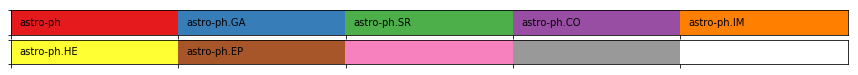

In [168]:
def keyplot(pal, names):
    n = len(pal)
    rows = int(n / 5)
    if n%5 > 0:
        rows += 1
    f, axes = plt.subplots(rows, 1, figsize=(15, .5*rows))
    if rows ==1:
        axes = [axes,]
    for idx,ax in enumerate(axes):
        current_pal = pal[idx*5:(idx*5)+5]
        if len(current_pal)<5:
            current_pal += ['white']*(5-len(current_pal))
        current_names = names[idx*5:(idx*5)+5]
        ax.imshow(np.arange(5).reshape(1, 5),
                  cmap=mpl.colors.ListedColormap(list(current_pal)),
                  interpolation="nearest", aspect="auto")
        ax.set_xticks(np.arange(5) - .5)
        ax.set_yticks([-.5, .5])
        for i,name in enumerate(current_names):
            ax.annotate(name,(-.45+i,0.1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

# Example:
keyplot(color_palette('Set1',9),names=['astro-ph', 
                                       'astro-ph.GA', 
                                       'astro-ph.SR',
                                       'astro-ph.CO',
                                       'astro-ph.IM',
                                       'astro-ph.HE',
                                       'astro-ph.EP'])

/Users/briennakh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


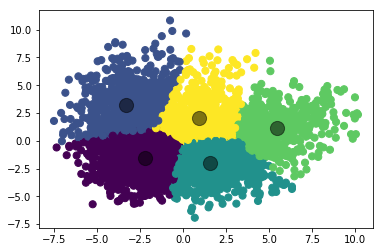